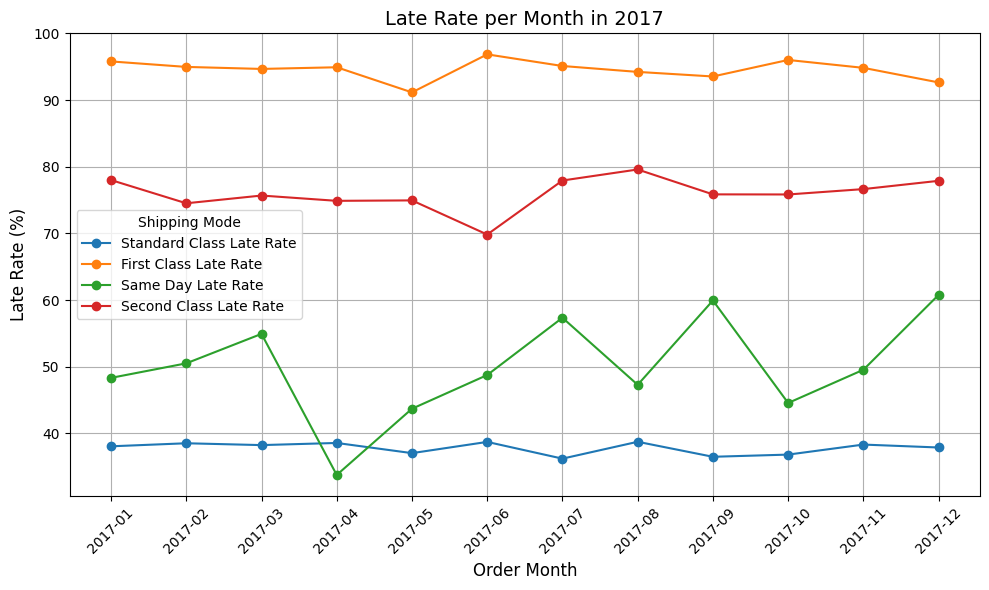

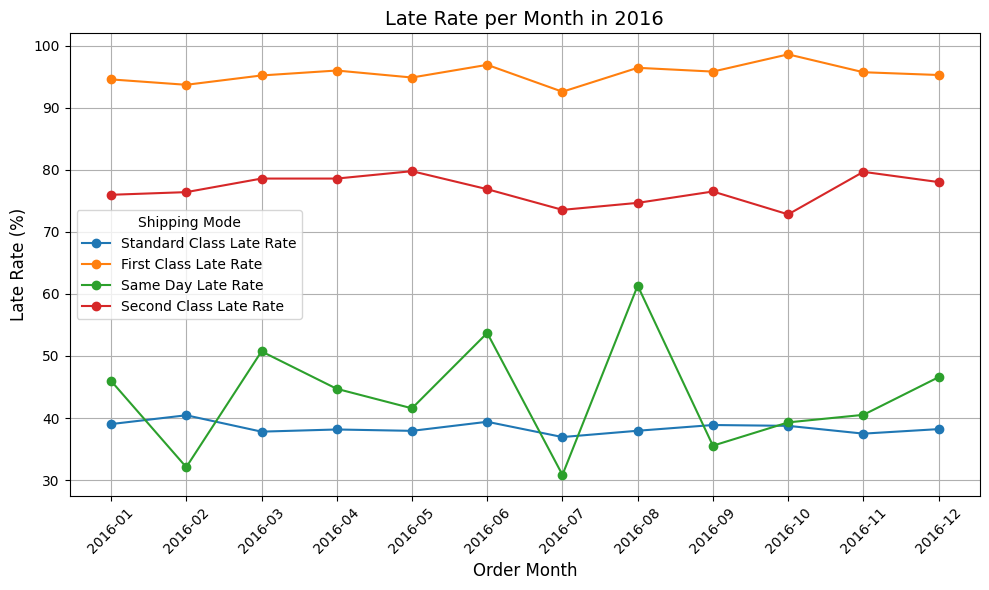

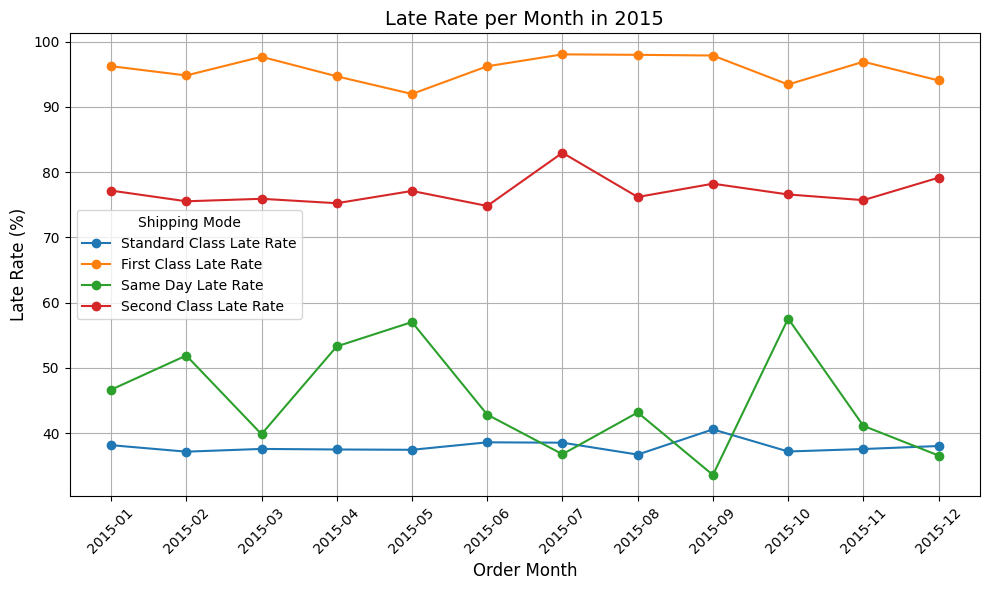

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('lateRatebyMonth_Shippingmode.csv')

# Convert 'order_month' to datetime for easy filtering and sorting
df['order_month'] = pd.to_datetime(df['order_month'], format='%Y-%m')

# Extract unique years in the data
years = df['order_month'].dt.year.unique()

# Create a plot for each year
for year in years:
    df_filtered = df[df['order_month'].dt.year == year].sort_values(by='order_month')
    
    # Create a plot for each shipping mode
    shipping_modes = df_filtered['shipping_mode'].unique()
    
    plt.figure(figsize=(10, 6))
    
    for mode in shipping_modes:
        # Filter data for each shipping mode
        df_mode = df_filtered[df_filtered['shipping_mode'] == mode]
        
        # Plot for the shipping mode
        plt.plot(df_mode['order_month'].dt.strftime('%Y-%m'), df_mode['late_rate'], 
                 marker='o', linestyle='-', label=f'{mode} Late Rate')
    
    plt.title(f'Late Rate per Month in {year}', fontsize=14)
    plt.xlabel('Order Month', fontsize=12)
    plt.ylabel('Late Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Shipping Mode")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
